In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats
import os
from scipy.stats import variation 
from scipy.stats import ttest_rel
import statistics as s
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression

In [2]:
pip install outlier_utils

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("cubic_zirconia.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
df.shape

(26967, 10)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Independent Variables (IVs) ratio should ideally be 20:1; that is 20 cases for every IV in the model. The lowest your ratio should be is 5:1 (i.e., 5 cases for every IV in the model).


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [10]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [89]:
df.fillna(df.median())

,carat,depth,table,x,y,z,price,Cut_Ordinal,Color_Ordinal,Claritiy_Ordinal
0,0.30,62.1,58.0,4.27,4.29,2.66,499,5,6,3
1,0.33,60.8,58.0,4.42,4.46,2.70,984,4,4,8
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,3,6,6
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,5,5,5
4,0.31,60.4,59.0,4.35,4.43,2.65,779,5,5,7
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408,4,4,3
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114,5,3,8
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656,4,6,4
26965,0.27,61.8,56.0,4.19,4.20,2.60,682,3,5,6


In [90]:
df.isnull().sum()

carat               0
depth               0
table               0
x                   0
y                   0
z                   0
price               0
Cut_Ordinal         0
Color_Ordinal       0
Claritiy_Ordinal    0
dtype: int64

In [15]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 35


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
7745,0.33,Ideal,G,VVS1,62.0,56.0,4.48,4.45,2.77,1114
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943


In [16]:
df.drop_duplicates(inplace=True) 

In [17]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]


Number of duplicate rows = 0


,carat,cut,color,clarity,depth,table,x,y,z,price


In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10804
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5652
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1838
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [19]:
def univariateAnalysis_numeric(column,nbins):
   
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()

In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64',])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Distribution of carat
----------------------------------------------------------------------------


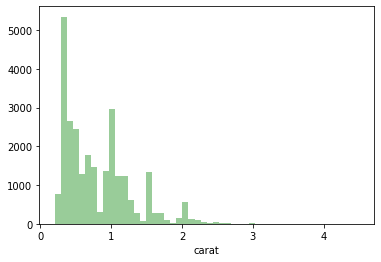

Distribution of depth
----------------------------------------------------------------------------


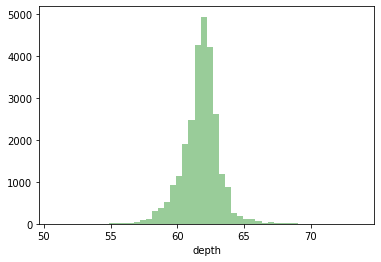

Distribution of table
----------------------------------------------------------------------------


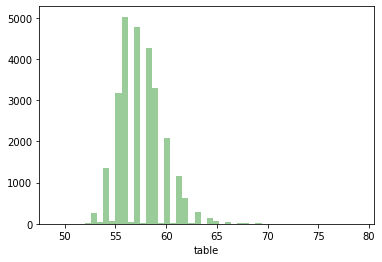

Distribution of x
----------------------------------------------------------------------------


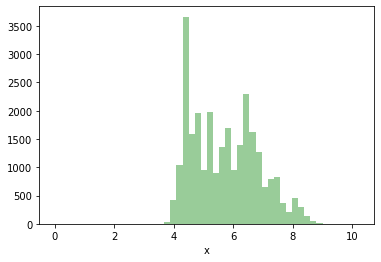

Distribution of y
----------------------------------------------------------------------------


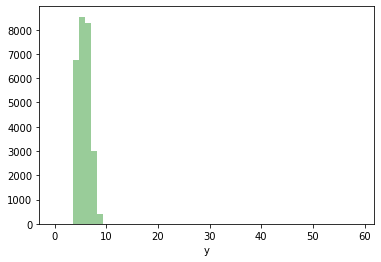

Distribution of z
----------------------------------------------------------------------------


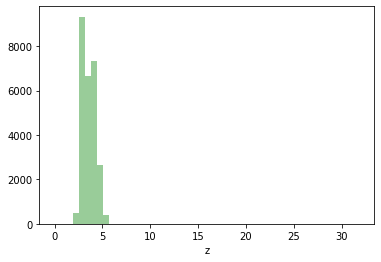

Distribution of price
----------------------------------------------------------------------------


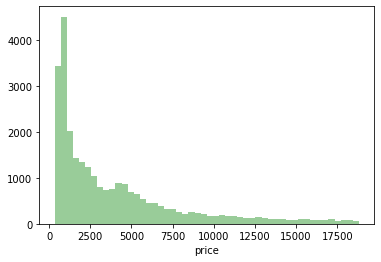

In [21]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [22]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


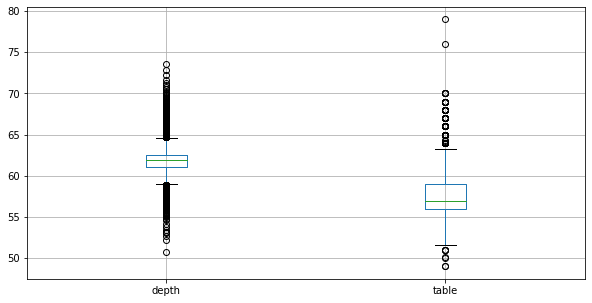

In [23]:
df.boxplot(column=[ 'depth', 'table', ], figsize=(10,5))

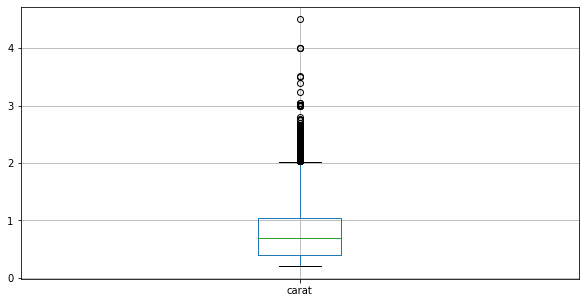

In [24]:
df.boxplot(column=['carat' ], figsize=(10,5))

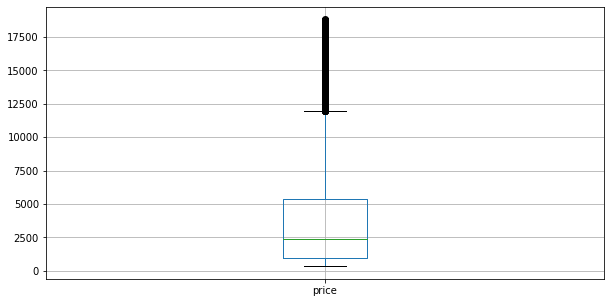

In [25]:
df.boxplot(column=['price'], figsize=(10,5))

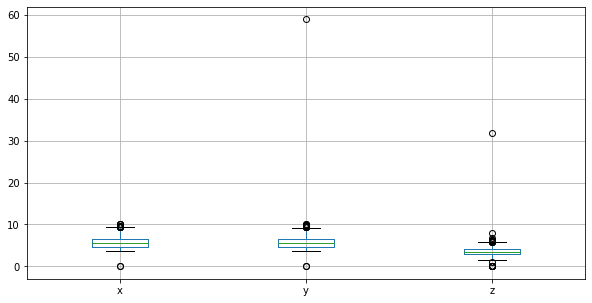

In [27]:
df.boxplot(column=['x','y','z'], figsize=(10,5))

In [28]:
df= df.drop(df[(df['table'] > 70) ].index)


In [29]:
df= df.drop(df[(df['carat'] > 4) ].index)

In [31]:
df = df.drop(df[(df['z'] > 20) ].index)

In [32]:
df = df.drop(df[(df['y'] > 30) ].index)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


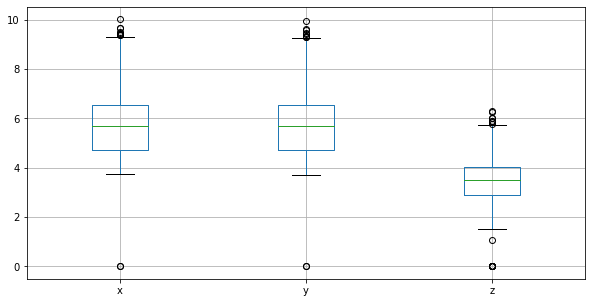

In [33]:
df.boxplot(column=['x','y','z'], figsize=(10,5))


In [34]:
from outliers import smirnov_grubbs as grubbs
from statistics import variance

In [35]:
print(df.var())

carat    2.264825e-01
depth    1.941757e+00
table    4.952376e+00
x        1.268885e+00
y        1.250529e+00
z        4.871454e-01
price    1.616519e+07
dtype: float64


####  The variance can be useful when you’re using a technique like ANOVA or Regression and you’re trying to explain the total variance in a model due to specific factors. For this the result above we cans ee that after imputing the missing object and removing the abstract outliers our data is more or less evenly spread out.


In [36]:
corr = df_num.corr(method='pearson')

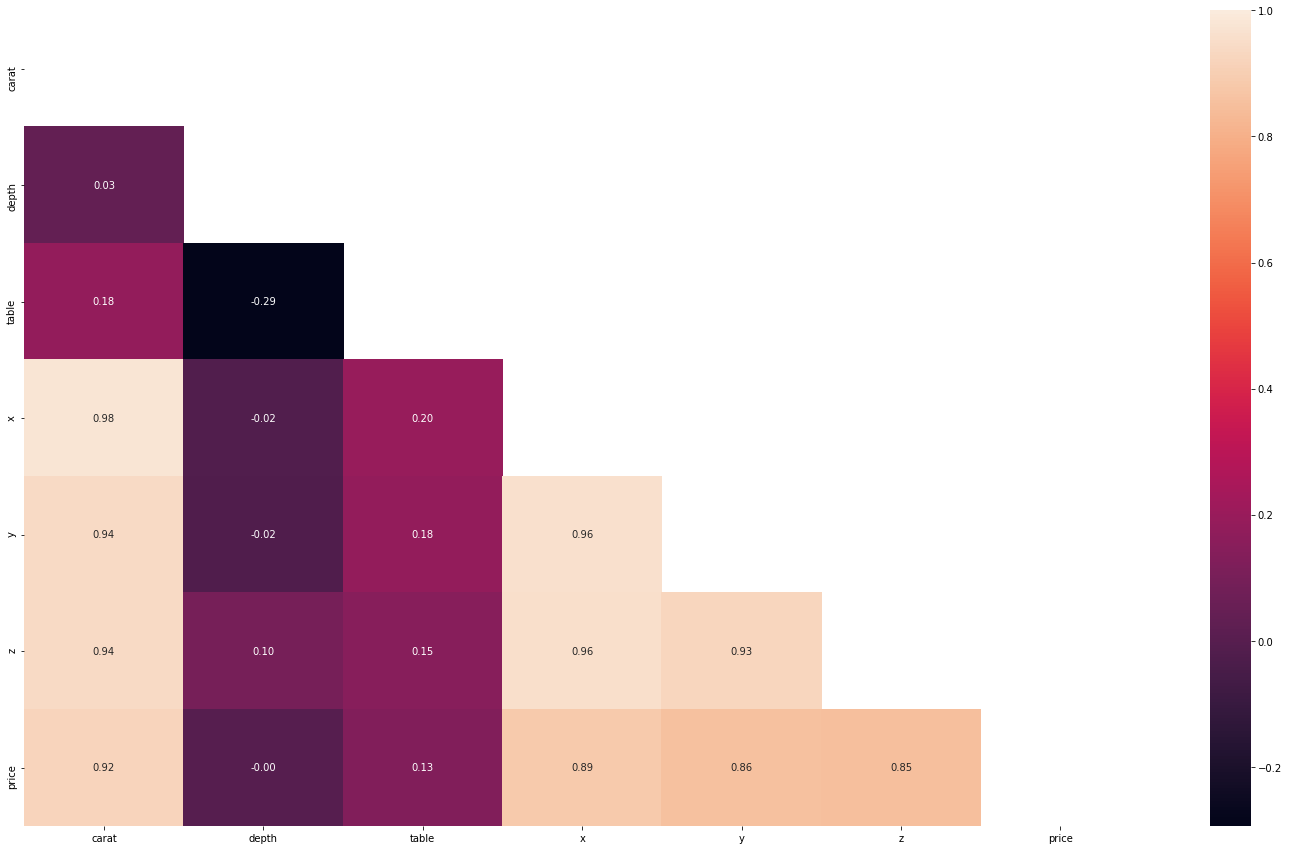

In [37]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [38]:
df.corr()['price']

carat    0.923036
depth   -0.002901
table    0.127161
x        0.886420
y        0.887936
z        0.876988
price    1.000000
Name: price, dtype: float64

In [39]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


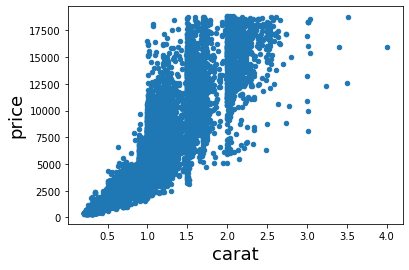

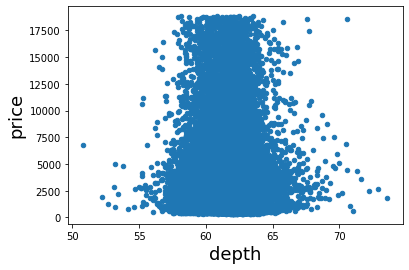

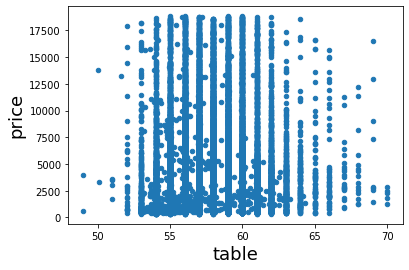

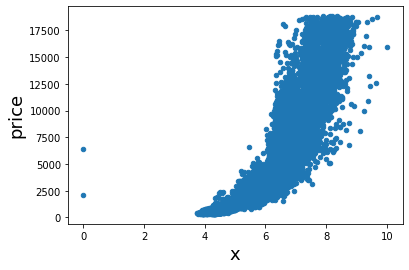

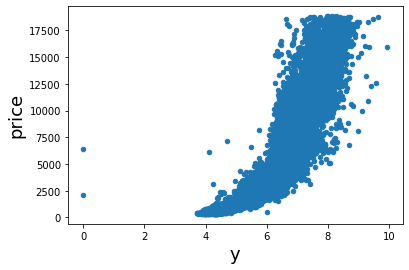

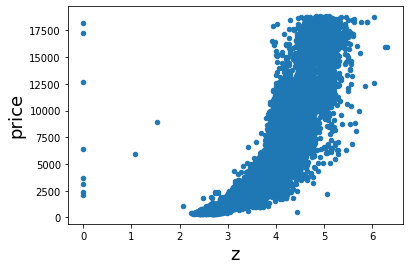

In [41]:
df.plot.scatter(x='carat', y='price')
plt.xlabel('carat', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

df.plot.scatter(x='depth', y='price')
plt.xlabel('depth', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

df.plot.scatter(x='table', y='price')
plt.xlabel('table', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

df.plot.scatter(x='x', y='price')
plt.xlabel('x', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

df.plot.scatter(x='y', y='price')
plt.xlabel('y', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()

df.plot.scatter(x='z', y='price')
plt.xlabel('z', fontsize=18)
plt.ylabel('price', fontsize=18)
plt.show()


In [ ]:
# Question 2


In [42]:
df.isnull().values.any()

False

In [46]:
df = df.drop(df[(df['y'] == 0)].index)

In [47]:
df = df.drop(df[(df['z'] == 0)].index)

In [48]:
df = df.drop(df[(df['x'] == 0)].index)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [51]:
df.sort_values(by = 'z', ascending = True).head()

,carat,cut,color,clarity,depth,table,x,y,z,price
21604,1.07,Ideal,F,SI1,60.6,57.0,6.62,6.67,1.07,5909
4828,1.53,Ideal,I,SI1,61.9,54.0,7.43,7.50,1.53,8971
26819,0.38,Ideal,E,VVS2,60.9,56.0,4.71,4.68,2.06,1068
25498,0.20,Premium,E,VS2,59.0,60.0,3.81,3.78,2.24,367
12748,0.20,Premium,E,VS2,59.8,62.0,3.79,3.77,2.26,367


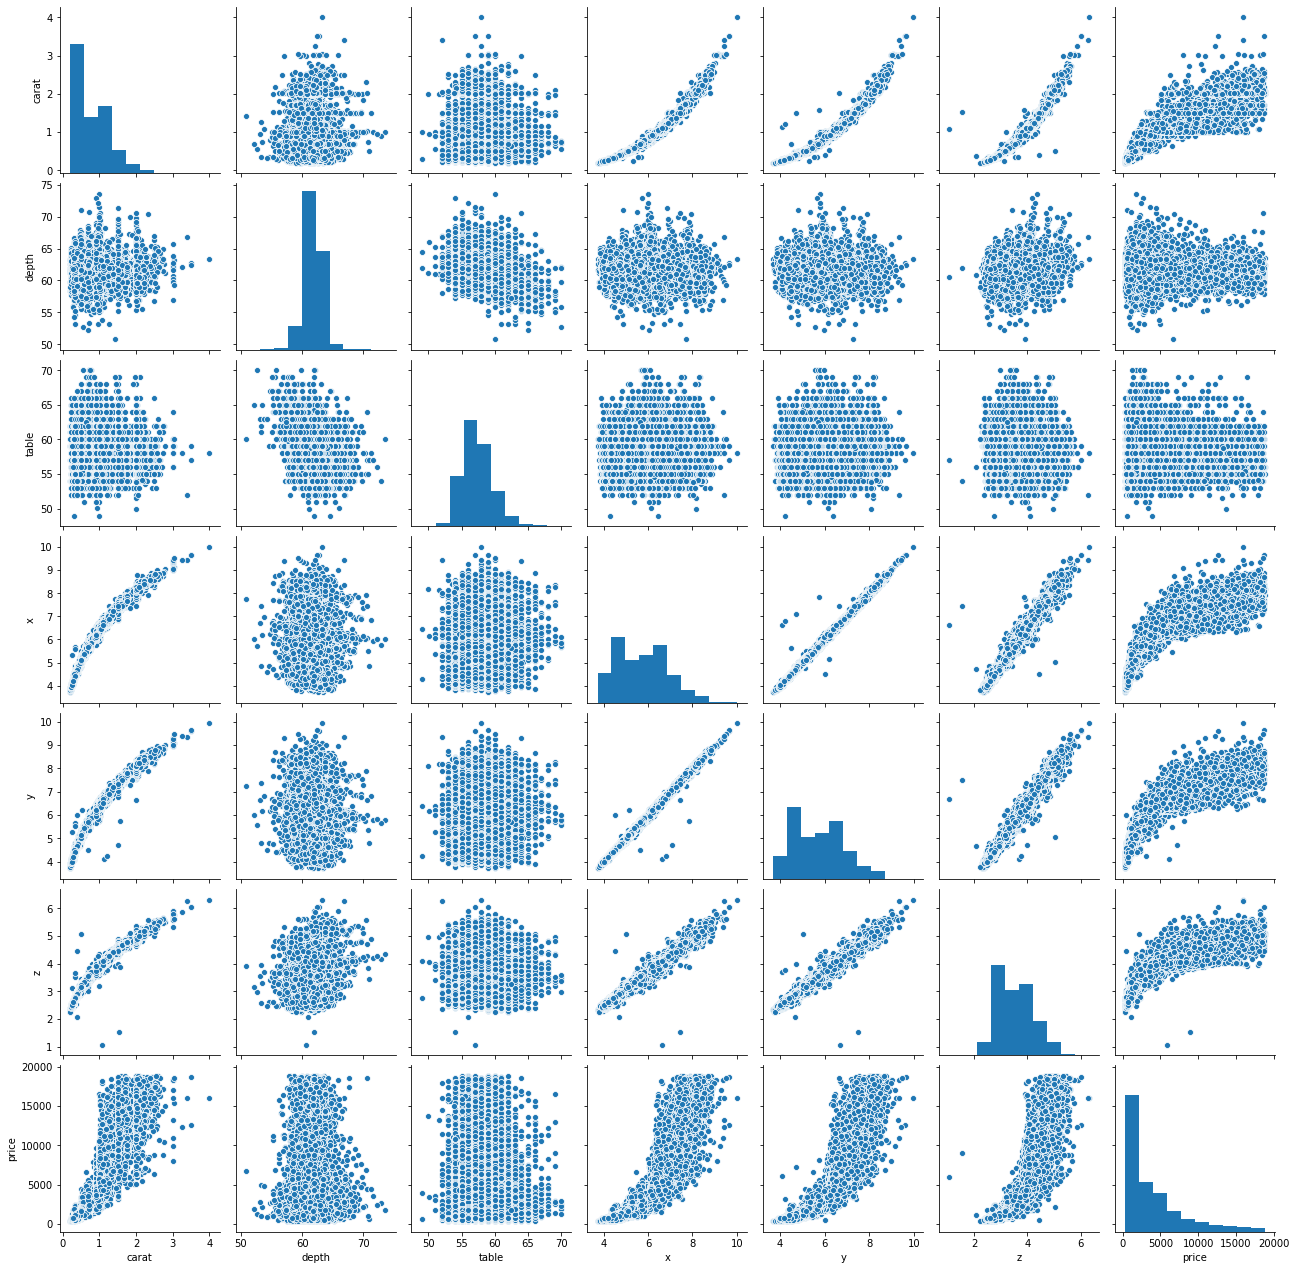

In [52]:
sns.pairplot(df ,diag_kind='hist' );

In [53]:
skewValue = df.skew(axis=0)
print("Skew:")

print(skewValue)


Skew:
carat    1.086167
depth   -0.044488
table    0.718665
x        0.397447
y        0.392870
z        0.394545
price    1.619216
dtype: float64


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [56]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           776
Good          2434
Very Good     6026
Premium       6877
Ideal        10804
Name: cut, dtype: int64


COLOR :  7
J    1438
I    2764
D    3341
H    4090
F    4721
E    4915
G    5648
Name: color, dtype: int64


CLARITY :  8
I1       359
IF       891
VVS1    1838
VVS2    2530
VS1     4085
SI2     4559
VS2     6092
SI1     6563
Name: clarity, dtype: int64




In [57]:
cut_dict = {'Ideal': 5,'Premium': 4,'Very Good': 3,'Good':2,'Fair':1}

In [58]:
df['Cut_Ordinal']= df.cut.map(cut_dict)

In [59]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,Cut_Ordinal
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,5
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,4
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,3
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,5
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,5


In [60]:
color_dict = {'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}

In [61]:

df['Color_Ordinal']= df.color.map(color_dict)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,Cut_Ordinal,Color_Ordinal
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,5,6
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,4,4
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,3,6
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,5,5
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,5,5


In [62]:
clarity_dict = {'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}
df['Claritiy_Ordinal']= df.clarity.map(clarity_dict)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,Cut_Ordinal,Color_Ordinal,Claritiy_Ordinal
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,5,6,3
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,4,4,8
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,3,6,6
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,5,5,5
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,5,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408,4,4,3
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114,5,3,8
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656,4,6,4
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682,3,5,6


In [63]:
df = df.drop(['cut','color','clarity'], axis = 1)

In [64]:
df.head()

,carat,depth,table,x,y,z,price,Cut_Ordinal,Color_Ordinal,Claritiy_Ordinal
0,0.30,62.1,58.0,4.27,4.29,2.66,499,5,6,3
1,0.33,60.8,58.0,4.42,4.46,2.70,984,4,4,8
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,3,6,6
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,5,5,5
4,0.31,60.4,59.0,4.35,4.43,2.65,779,5,5,7


In [65]:
df.dtypes


carat               float64
depth               float64
table               float64
x                   float64
y                   float64
z                   float64
price                 int64
Cut_Ordinal           int64
Color_Ordinal         int64
Claritiy_Ordinal      int64
dtype: object

In [66]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = df.drop('price', axis=1)


# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [67]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

In [68]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

In [69]:
from sklearn import datasets, linear_model, metrics
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
  

  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
  
# plot for residual error
  
## setting plot style
plt.style.use('fivethirtyeight')

Variance score: 0.9059892389656568


In [70]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg.coef_[0][idx]))

The coefficient for carat is 11526.804283521076
The coefficient for depth is 67.07870052635923
The coefficient for table is -25.099440728457694
The coefficient for x is -1609.6340778632612
The coefficient for y is 2032.3370366176962
The coefficient for z is -2541.4538049736843
The coefficient for Cut_Ordinal is 120.86358714626707
The coefficient for Color_Ordinal is 330.4134300989065
The coefficient for Claritiy_Ordinal is 493.31683037991746


In [71]:
intercept = reg.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5311.616936307499


In [72]:
reg.score(X_train, y_train)

0.9135495060527841

In [73]:

reg.score(X_test, y_test)

0.9059892389656568

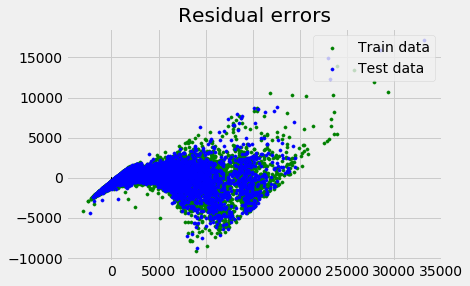

In [74]:
plt.style.use('fivethirtyeight')
  
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [83]:
# ---------------------------------- Using Statsmodel library to get R type outputs -----------------------------

In [93]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,carat,depth,table,x,y,z,Cut_Ordinal,Color_Ordinal,Claritiy_Ordinal,price
1025,0.45,62.0,55.0,4.92,4.95,3.06,5,7,2,706
3559,0.58,60.8,57.0,5.41,5.42,3.29,5,6,5,2241
26415,0.54,62.2,55.0,5.24,5.21,3.25,5,6,4,1847
13472,0.31,62.1,56.0,4.36,4.33,2.70,5,5,8,1046
21381,1.51,61.0,56.0,7.29,7.37,4.47,2,3,2,8243


In [119]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+table+x+y+z+Cut_Ordinal+Color_Ordinal+Claritiy_Ordinal+depth', data = data_train).fit()
lm1.params

Intercept           -5311.616936
carat               11526.804284
table                 -25.099441
x                   -1609.634078
y                    2032.337037
z                   -2541.453805
Cut_Ordinal           120.863587
Color_Ordinal         330.413430
Claritiy_Ordinal      493.316830
depth                  67.078701
dtype: float64

In [120]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 2.211e+04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:06:27   Log-Likelihood:            -1.6016e+05
No. Observations:               18841   AIC:                         3.203e+05
Df Residuals:                   18831   BIC:                         3.204e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5311.6169   1179.785  

In [96]:
mse = np.mean((reg.predict(X_test2)-y_test2)**2)

In [97]:

import math

math.sqrt(mse)

1211.060589707649

In [98]:
reg.score(X_train2, y_train2)

0.9134803292063047

In [99]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

reg.score(X_test2, y_test2)

0.9061666192551155

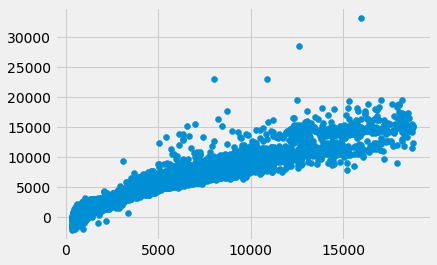

In [100]:

y_pred2 = reg.predict(X_test2)
plt.scatter(y_test2['price'], y_pred2)

## SCALING DATA:    

In [101]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [102]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.358011781767273
The coefficient for table is 0.023047140222442905
The coefficient for x is -0.01386851394447563
The coefficient for y is -0.4478279467158854
The coefficient for z is 0.561192418162685
The coefficient for Cut_Ordinal is -0.4363901158131127
The coefficient for Color_Ordinal is 0.03333008418999852
The coefficient for Claritiy_Ordinal is 0.13964969149002135


In [104]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))


The intercept for our model is 5.669365148275215e-16


In [105]:

regression_model.score(X_train_scaled, y_train_scaled)

0.913549506052784

In [106]:

regression_model.score(X_test_scaled, y_test_scaled)

0.9062195539815678

In [107]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)
math.sqrt(mse)

0.30623593195187304

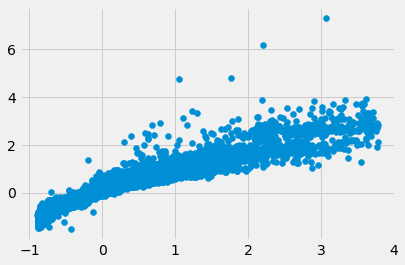

In [108]:
y_pred = regression_model.predict(X_test_scaled)
plt.scatter(y_test_scaled['price'], y_pred)

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [111]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1



carat ---> 94.22218228320197
depth ---> 1214.8429897425356
table ---> 863.5825603020052
x ---> 11079.172486883439
y ---> 9628.282269517584
z ---> 3899.376305720463
Cut_Ordinal ---> 18.002962697813977
Color_Ordinal ---> 8.544292828769136
Claritiy_Ordinal ---> 8.663076759258686


In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt


In [113]:

cv = KFold(n_splits=10, random_state=0, shuffle=False)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y,y_pred),2)))

C:\Users\josep\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RMSE: 745.22
R_squared: 0.97


In [114]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import make_pipeline

In [115]:
classifier_pipeline = make_pipeline(StandardScaler(),LinearRegression)

In [116]:
sfs1 = SFS(classifier_pipeline, 
           k_features=9, 
           forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv)

X = df.drop(columns='price')

sfs1.fit(X,y)

sfs1.subsets_

C:\Users\josep\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit() missing 1 required positional argument: 'y'

  FitFailedWarning)
C:\Users\josep\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit() missing 1 required positional argument: 'y'

  FitFailedWarning)
C:\Users\josep\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit() missing 1 required positional argument: 'y'

  FitFailedWarning)
C:\Users\josep\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
  'avg_score': nan,
  'feature_names': ('carat',
   'depth',
   'table',
   'x',
   'y',
   'z',
   'Cut_Ordinal',
   'Color_Ordinal',
   'Claritiy_Ordinal')}}

In [117]:
sfs = SFS(regression_model, 
          k_features=9, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

NameError: name 'plot_sfs' is not defined

In [ ]:
from itertools import combinations
columns_list = X_train.columns
interactions = list(combinations(column_list, 2))